In [3]:
import pandas as pd
from IPython.display import display
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
#%matplotlib inline   

churn_data = pd.read_csv('E:\VS\Visualization\churn.csv')
#print(churn_data.info())
churn_data['Exited_label'] = churn_data['Exited'].replace({1: 'Ушедшие клиенты', 0:'Лояльные клиенты'})
churn_data['IsActiveMember_label'] = churn_data['IsActiveMember'].replace({1: 'Активные клиенты', 0:'Не активные клиенты'})
print(churn_data.columns)






Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Exited_label',
       'IsActiveMember_label'],
      dtype='object')


<>:10: SyntaxWarning: invalid escape sequence '\V'
<>:10: SyntaxWarning: invalid escape sequence '\V'
C:\Users\user\AppData\Local\Temp\ipykernel_7104\3253449754.py:10: SyntaxWarning: invalid escape sequence '\V'
  churn_data = pd.read_csv('E:\VS\Visualization\churn.csv')


ЗАДАНИЕ 9.1 -----------------------------------------------
Соотношение ушедших = 0.2037, лояльных = 0.7963
Комментарий: Число ушедших составляет 1/5 от всех пользователей банка


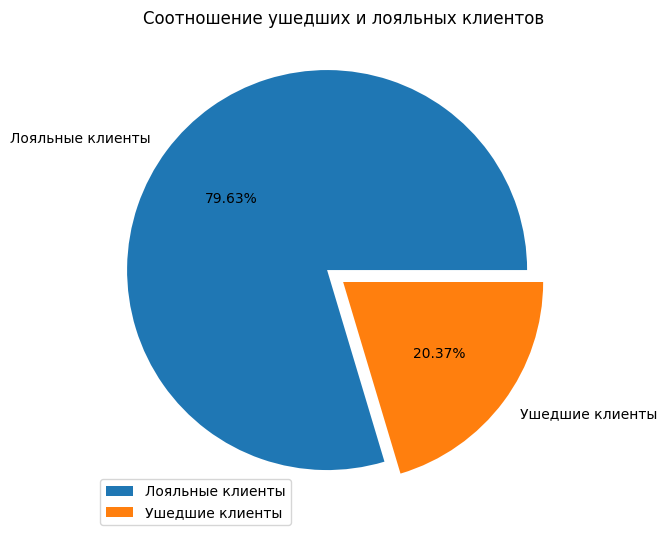

In [65]:
print("ЗАДАНИЕ 9.1 -----------------------------------------------")
all=churn_data['Exited'].count()
gone=churn_data['Exited'].value_counts()[1]/all #Соотношение ушедших к общему количеству
loyal=churn_data['Exited'].value_counts()[0]/all #Соотношение лояльных к общему количеству
#print(churn_data['Exited'].value_counts())
print(f"Соотношение ушедших = {gone}, лояльных = {loyal}")

#строим график
loyal = churn_data['Exited_label'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyal,
    labels=loyal.index,
    autopct='%.2f%%',
    explode = [0.1, 0]
);
plt.title('Соотношение ушедших и лояльных клиентов')
plt.legend()
print("Комментарий: Число ушедших составляет 1/5 от всех пользователей банка")



ЗАДАНИЕ 9.2 -----------------------------------------------
Комментарий: Большинство клиентов имеют на балансе примерно 125000


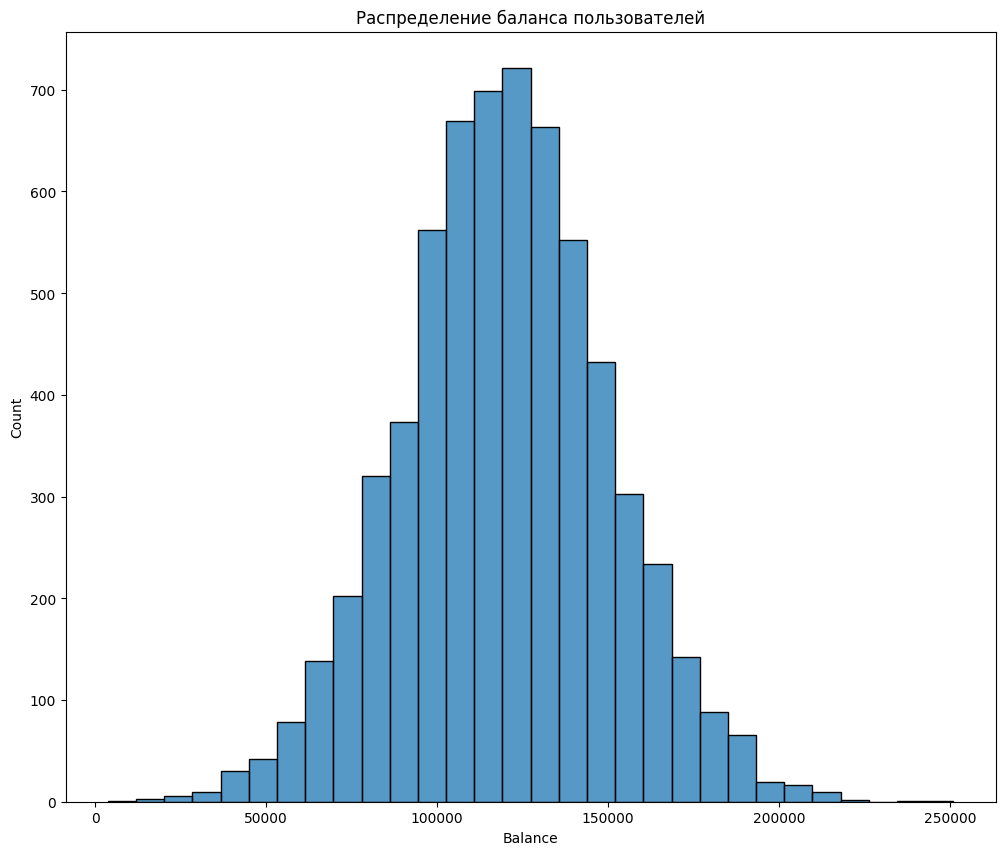

In [66]:
print("ЗАДАНИЕ 9.2 -----------------------------------------------")
mask=churn_data['Balance'] > 2500
fig = plt.subplots(figsize=(12, 10))
histplot1 = sns.histplot(
    data=churn_data, 
    x=churn_data[mask]['Balance'], 
    bins=30,
)
plt.title('Распределение баланса пользователей')
print("Комментарий: Большинство клиентов имеют на балансе примерно 125000")


ЗАДАНИЕ 9.3 -----------------------------------------------
Комментарий: Большинство ушедших клиентов имело на балансе примерно 110000. Большинство лояльных клиентов имеет на балансе примерно 130000
Баланс большиства лояльных клиентов больше, чем баланс большинства ушедших клиентов
Вероятная причина: не подходящие условия банка


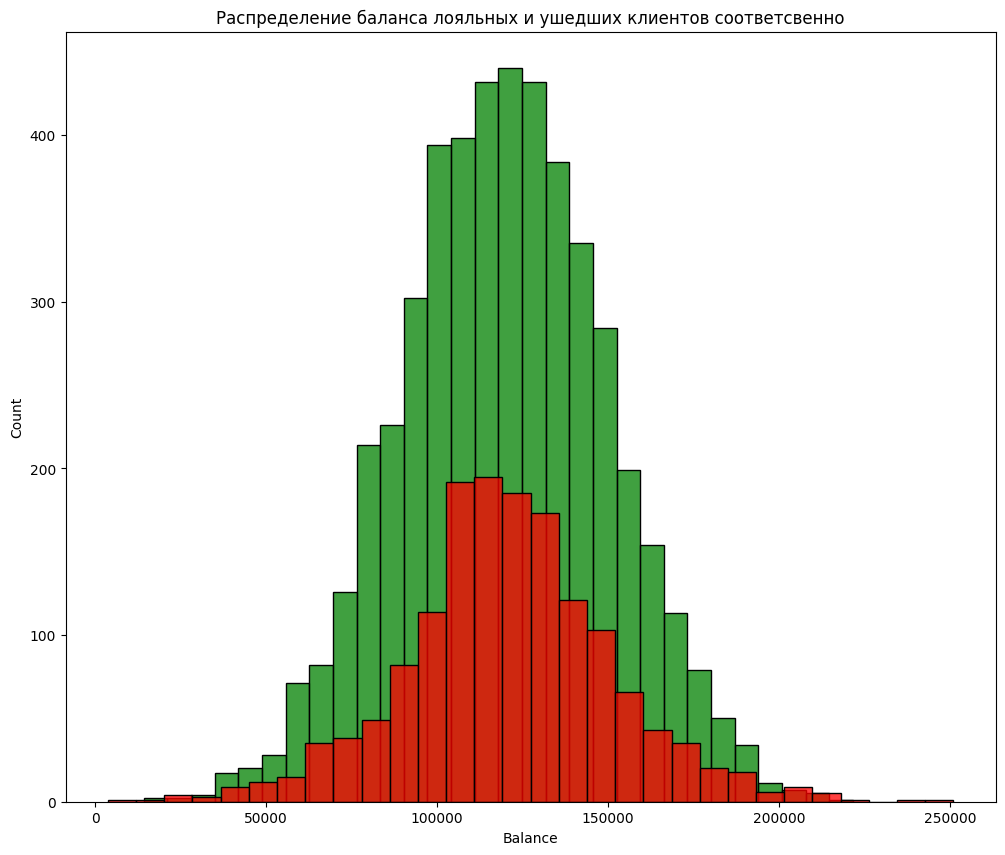

In [67]:
print("ЗАДАНИЕ 9.3 -----------------------------------------------")
mask_loyal=(churn_data['Balance'] > 2500) & (churn_data['Exited'] == 0)
mask_gone=(churn_data['Balance'] > 2500) & (churn_data['Exited'] == 1)
fig = plt.subplots( figsize=(12, 10))
histplot1 = sns.histplot(
    data=churn_data, 
    x=churn_data[mask_loyal]['Balance'], 
    bins=30,
    color='green'
)
histplot2 = sns.histplot(
    data=churn_data, 
    x=churn_data[mask_gone]['Balance'], 
    bins=30,
    color='red'
)
plt.title('Распределение баланса лояльных и ушедших клиентов соответсвенно')
print("Комментарий: Большинство ушедших клиентов имело на балансе примерно 110000. Большинство лояльных клиентов имеет на балансе примерно 130000" )
print("Баланс большиства лояльных клиентов больше, чем баланс большинства ушедших клиентов")
print("Вероятная причина: не подходящие условия банка")

ЗАДАНИЕ 9.4 -----------------------------------------------
Комментарий: Длина ящика с усами для ушедших клиентов от 18 до 70 ( Медианных возраст - 45). 
    Для лояльных - от 18 до 57 (Медианных возраст - 36). 
    Число потенциальных выбросов по возрасту среди группы лояльных значительно больше, чем в группе ушедших. 
    Можно предположить, что пользователи с возрастом 85+ — это люди, которые намеренно или ошибочно указали неверный возраст,
    и среди подписчиков их больше. Этот факт нуждается в дальнейшем исследовании.
    Больше всего выборосов у лояльных клиентов.
    Банку стоит обратить внимание на возрастную категорию от 38 до 51 года, для удержания клиентов, данной возрастной категории
    


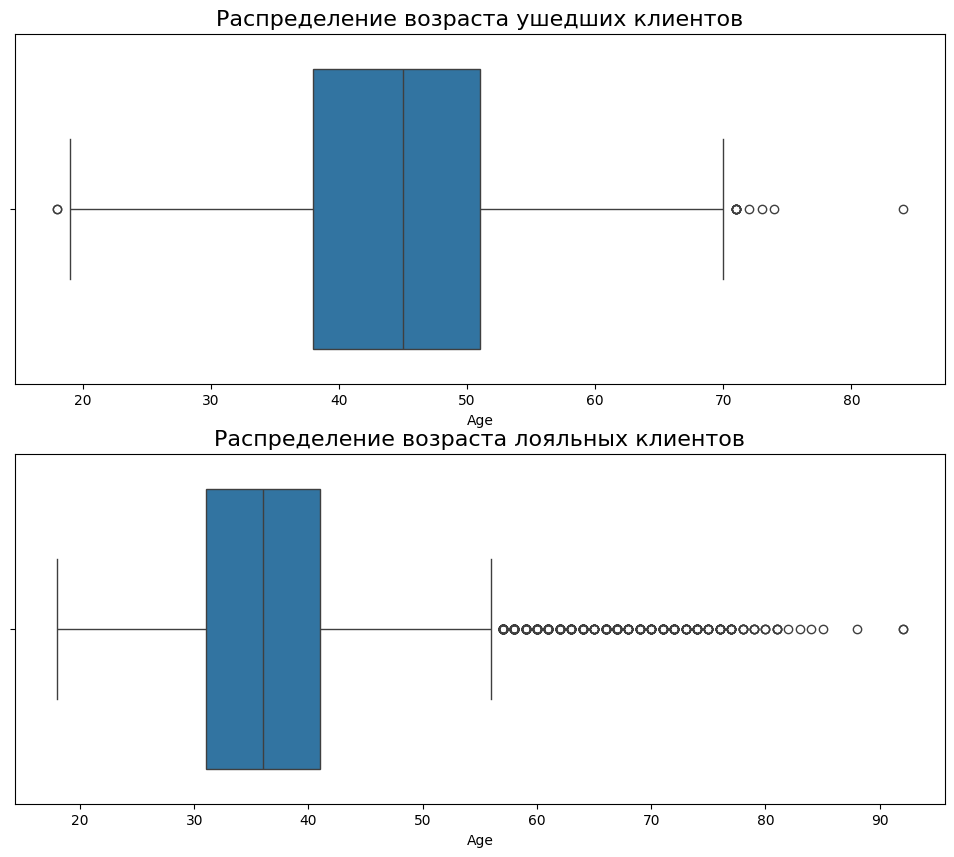

In [68]:
print("ЗАДАНИЕ 9.4 -----------------------------------------------")
mask_loyal= (churn_data['Exited'] == 0)
mask_gone= (churn_data['Exited'] == 1)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
boxplot1 = sns.boxplot(data=churn_data, x=churn_data[mask_gone]['Age'], ax=axes[0])
boxplot2 = sns.boxplot(data=churn_data, x=churn_data[mask_loyal]['Age'], ax=axes[1])

boxplot1.set_title('Распределение возраста ушедших клиентов', fontsize=16)
boxplot2.set_title('Распределение возраста лояльных клиентов', fontsize=16)
print("""Комментарий: Длина ящика с усами для ушедших клиентов от 18 до 70 ( Медианных возраст - 45). 
    Для лояльных - от 18 до 57 (Медианных возраст - 36). 
    Число потенциальных выбросов по возрасту среди группы лояльных значительно больше, чем в группе ушедших. 
    Можно предположить, что пользователи с возрастом 85+ — это люди, которые намеренно или ошибочно указали неверный возраст,
    и среди подписчиков их больше. Этот факт нуждается в дальнейшем исследовании.
    Больше всего выборосов у лояльных клиентов.
    Банку стоит обратить внимание на возрастную категорию от 38 до 51 года, для удержания клиентов, данной возрастной категории
    """)


ЗАДАНИЕ 9.5 -----------------------------------------------
Комментарий: Средний кредитный рейтинг для обоих групп: 650. Наибольшую предполагаемую зп имеют клиенты со средним кредитным рейтингом. 
      Взаимосвязи не вижу. Кредитный рейтинг может влиять на размер зарплаты. Например, в случае с курьерами многие компании запрашивают кредитные истории соискателей
      и на основе рейтинга устанавливают максимальную ценность доставляемых заказов. Чем ниже рейтинг, тем менее ценные грузы будет развозить курьер, а его зарплата напрямую зависит от стоимости заказов.
      Также высокий кредитный рейтинг повышает шансы на получение кредита, но не влияет на результат рассмотрения заявки в конкретной финансовой организации. 
      Банк или МФО исходят из скорингового балла, выведенного программой при анализе данных заёмщика, и высокий кредитный рейтинг в данном случае имеет косвенное значение.
      


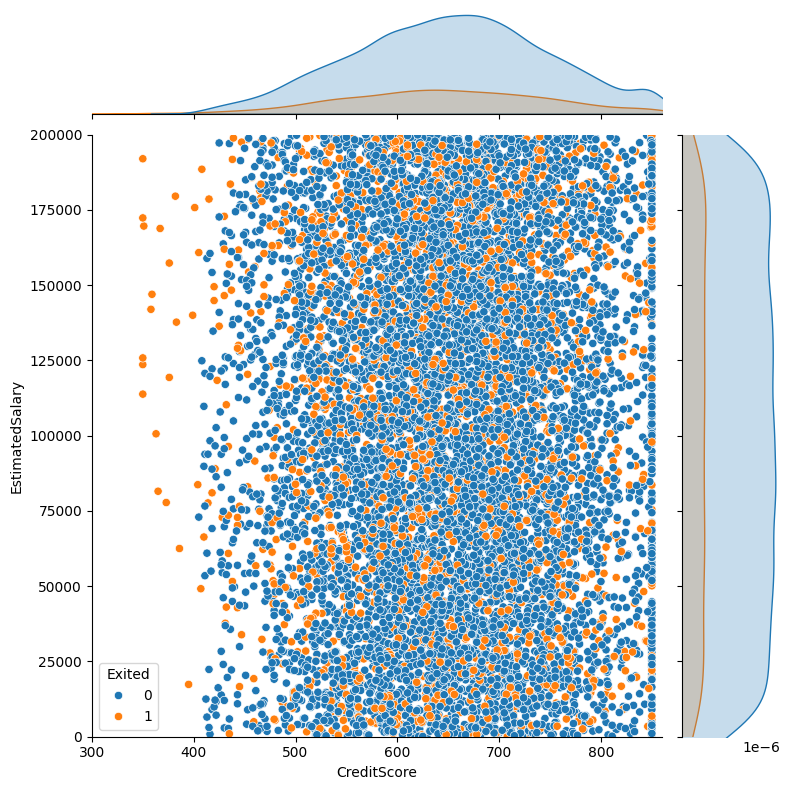

In [69]:
print("ЗАДАНИЕ 9.5 -----------------------------------------------")
jointplot = sns.jointplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
    xlim = (300, 860),
    ylim = (0, 200000),
    height=8,
);
print('''Комментарий: Средний кредитный рейтинг для обоих групп: 650. Наибольшую предполагаемую зп имеют клиенты со средним кредитным рейтингом. 
      Взаимосвязи не вижу. Кредитный рейтинг может влиять на размер зарплаты. Например, в случае с курьерами многие компании запрашивают кредитные истории соискателей
      и на основе рейтинга устанавливают максимальную ценность доставляемых заказов. Чем ниже рейтинг, тем менее ценные грузы будет развозить курьер, а его зарплата напрямую зависит от стоимости заказов.
      Также высокий кредитный рейтинг повышает шансы на получение кредита, но не влияет на результат рассмотрения заявки в конкретной финансовой организации. 
      Банк или МФО исходят из скорингового балла, выведенного программой при анализе данных заёмщика, и высокий кредитный рейтинг в данном случае имеет косвенное значение.
      ''')

ЗАДАНИЕ 9.6 -----------------------------------------------
Комментарий: Большенство ушедших клиентов - женщины (60%)


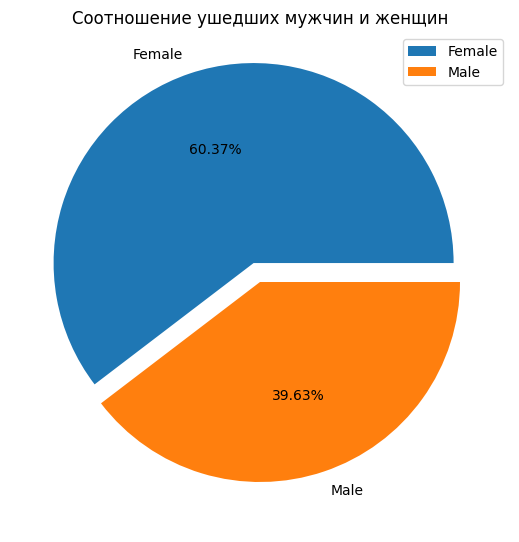

In [70]:
print("ЗАДАНИЕ 9.6 -----------------------------------------------")

res=churn_data.groupby(['Gender'])['Exited'].mean()
#print(churn_data['Exited'].value_counts())

#строим график
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(   
    res,
    labels=res.index,
    autopct='%.2f%%',
    explode = [0.1, 0]
);
plt.title('Соотношение ушедших мужчин и женщин')
plt.legend()
print("Комментарий: Большенство ушедших клиентов - женщины (60%)")

ЗАДАНИЕ 9.7 -----------------------------------------------
Комментарий: Наиболшее число лояльных клиентов имеют 2 услуги банка. Наибольшее число ушедших имело 1 услугу банка и с последующим снижением количества людей при увеличении услуг на их аккаунтах


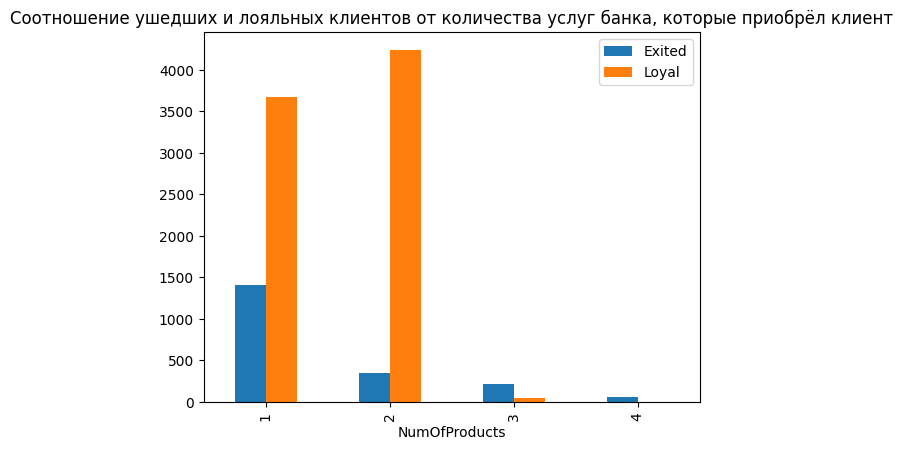

In [71]:
print("ЗАДАНИЕ 9.7 -----------------------------------------------")

churn_data['Loyal'] = 1 - churn_data['Exited']
result_df = churn_data.groupby(['NumOfProducts'])[['Exited','Loyal']].sum()   
fig_7 = result_df.plot(
    kind='bar')
plt.title('Соотношение ушедших и лояльных клиентов от количества услуг банка, которые приобрёл клиент')
print("Комментарий: Наиболшее число лояльных клиентов имеют 2 услуги банка. Наибольшее число ушедших имело 1 услугу банка и с последующим снижением количества людей при увеличении услуг на их аккаунтах")

ЗАДАНИЕ 9.8 -----------------------------------------------
Комментарий: Большенство ушедших клиентов - не имели статус активного клиента. Стоит улучшить уловия банка для увеличения числа активных клиентов


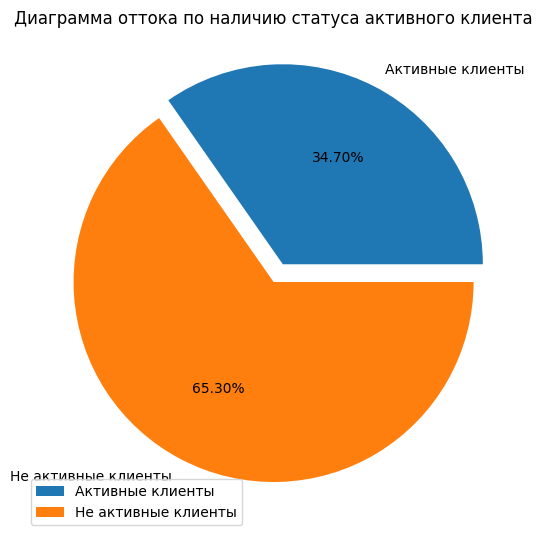

In [72]:
print("ЗАДАНИЕ 9.8 -----------------------------------------------")    
res=churn_data.groupby(['IsActiveMember_label'])['Exited'].mean()
#print(churn_data['Exited'].value_counts())

#строим график
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(   
    res,
    labels=res.index,
    autopct='%.2f%%',
    explode = [0.1, 0]
);
plt.title('Диаграмма оттока по наличию статуса активного клиента')
plt.legend()
print("Комментарий: Большенство ушедших клиентов - не имели статус активного клиента. Стоит улучшить уловия банка для увеличения числа активных клиентов")

In [73]:
print("ЗАДАНИЕ 9.9 -----------------------------------------------")  
#choropleth_data = churn_data.sort_values(by='date')
#choropleth_data['date'] = choropleth_data['date'].astype('string')

print(churn_data['Geography'].unique())
churn_countries = churn_data.groupby(['Geography'])[['Exited']].mean()
print(churn_countries)
#строим график
fig = px.choropleth(
    data_frame=churn_countries, #DataFrame
    locations=churn_countries.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color='Exited', #от чего зависит цвет
    #animation_frame="RowNumber", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    #title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds', #палитра цветов
    scope="europe"
)

#отображаем график
fig.show()
print("Комментарий: Большенство ушедших клиентов из Германии. Доля ушедних во Франции и Испании почти одинаковая")

ЗАДАНИЕ 9.9 -----------------------------------------------
['France' 'Spain' 'Germany']
             Exited
Geography          
France     0.161548
Germany    0.324432
Spain      0.166734


Комментарий: Большенство ушедших клиентов из Германии. Доля ушедних во Франции и Испании почти одинаковая


ЗАДАНИЕ 9.10 -----------------------------------------------
Комментарий: Наибольшее число ушедших имело низкий кредитный(Very poor) рейтинг и пользовались услугами банка 1 год. После идут люди с низким рейтигом(Very poor), но которые пользовались 10 лет. На 3 месте по рейтингу ушедших - Very poor - 4 года


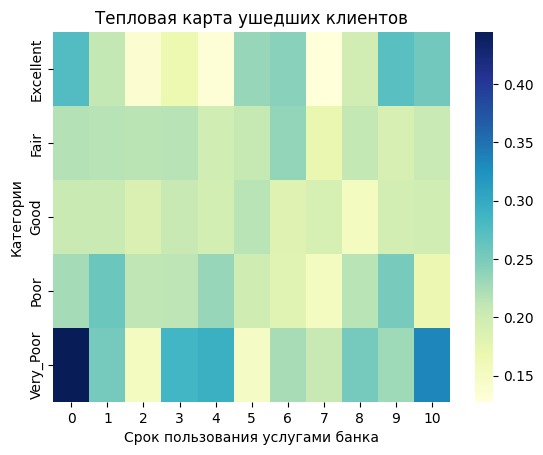

In [74]:
print("ЗАДАНИЕ 9.10 -----------------------------------------------")

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)
#print(churn_data['CreditScoreCat'])

pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
    aggfunc ='mean'
)
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set(title='Тепловая карта ушедших клиентов', xlabel='Срок пользования услугами банка', ylabel='Категории')
print("Комментарий: Наибольшее число ушедших имело низкий кредитный(Very poor) рейтинг и пользовались услугами банка 1 год. После идут люди с низким рейтигом(Very poor), но которые пользовались 10 лет. На 3 месте по рейтингу ушедших - Very poor - 4 года")
